# RL For Controlled Environment Agriculture

### Abstract
---

#### Key Results
1. Make an OpenAI Gym greenhouse environment for training DRL algorithms.

2. Determine if RL is suitable for optimal control in CEA
    1. Robust control over a distribution of environmental conditions
        - This distribution will vary with time
        - The purpose of this task is to determine if the algorithms can control the environment over a time interval with representing a growing season.
        - This may involve optimizing hyper parameters
        - this may also involve examining how the reward manifold affects learning
    2. Transfer Learning
        - environmental conditions outside of training distribution
        - transfer learning between growth environments of different physical scale


## 1. Introduction
---

Demands on agricultural systems will increase as the world population continues to increase.
Labor is the dominant cost component in most agricultural system.
Unsurprisingly, most research focuses on reduction of labor costs through increased efficiency via mechanization, automation and increased yield.
Controlled environment Agriculture (CEA) is an old idea gaining more recent momentum due to advances in automation, lighting and climate control.
One of the fundamental challenges of CEA is optimal control of the growing environment.
Traditional methods of optimal control in agriculture include reactive methods (thermostats) and predictive methods (PID).
Reinforcement leaning(RL) is a well studied field that offers solutions for optimal control problems.
The combination of RL and Deep Learning(DL) techniques created the collection of techniques known as Deep Reinforcement Learning (DRL).
There is increasing interest in using DRL in real life optimal control problem including CEA.

## 2. Related Work
---
Most relevant related work is coming out of China.
Some good papers and some very bad ones.
All papers are essentially a proof of concept and do not rigorously explore the RL component.
Most of the recent papers use Actor-Critic because it is the most accessible SOTA for model-free RL.
Another common theme is using IoT devices to collect observational data.

Opportunities for further research:
- examining the reward manifold
- robustness to climate outside historical distribution
- robustness to deployment in diverse cultivation structures
- exploring value vs policy methods
- physically informed model based RL

Relevant CEA work:
- <div class="csl-entry">Cao, X., Yao, Y., Li, L., Zhang, W., An, Z., Zhang, Z., Guo, S., Xiao, L., Cao, X., &#38; Luo, D. (2021). <i>IGrow: A Smart Agriculture Solution to Autonomous Greenhouse Control</i>. http://arxiv.org/abs/2107.05464</div>
- <div class="csl-entry">An, Z., Cao, X., Yao, Y., Zhang, W., Li, L., Wang, Y., Guo, S., &#38; Luo, D. (2021). <i>A Simulator-based Planning Framework for Optimizing Autonomous Greenhouse Control Strategy</i>. www.aaai.org</div>
- <div class="csl-entry">Zhang, W., Cao, X., Yao, Y., An, Z., Luo, D., &#38; Xiao, X. (2021). <i>Robust Model-based Reinforcement Learning for Autonomous Greenhouse Control</i>. http://arxiv.org/abs/2108.11645</div>
- <div class="csl-entry">Overweg, H., Berghuijs, H. N. C., &#38; Athanasiadis, I. N. (2021). <i>CropGym: a Reinforcement Learning Environment for Crop Management</i>. http://arxiv.org/abs/2104.04326</div>
- <div class="csl-entry">Wang, L., He, X., &#38; Luo, D. (2020). Deep reinforcement learning for greenhouse climate control. <i>Proceedings - 11th IEEE International Conference on Knowledge Graph, ICKG 2020</i>, 474–480. https://doi.org/10.1109/ICBK50248.2020.00073</div>
- <div class="csl-entry">Sun, L., Yang, Y., Hu, J., Porter, D., Marek, T., &#38; Hillyer, C. (2018). Reinforcement learning control for water-efficient agricultural irrigation. <i>Proceedings - 15th IEEE International Symposium on Parallel and Distributed Processing with Applications and 16th IEEE International Conference on Ubiquitous Computing and Communications, ISPA/IUCC 2017</i>, 1334–1341. https://doi.org/10.1109/ISPA/IUCC.2017.00203</div>
- <div class="csl-entry">Ban, B., &#38; Kim, S. (2017). Control of nonlinear, complex and black-boxed greenhouse system with reinforcement learning. <i>2017 International Conference on Information and Communication Technology Convergence (ICTC)</i>, 913–918. https://doi.org/10.1109/ICTC.2017.8190813</div>

Relevant simulation work:
- <div class="csl-entry">Fitz-Rodríguez, E., Kubota, C., Giacomelli, G. A., Tignor, M. E., Wilson, S. B., &#38; McMahon, M. (2010). Dynamic modeling and simulation of greenhouse environments under several scenarios: A web-based application. <i>Computers and Electronics in Agriculture</i>, <i>70</i>(1), 105–116. https://doi.org/10.1016/j.compag.2009.09.010</div>
-

## 3. Alpha Grow (Methods)
---
The goal is to assess which algorithms are the most robust to the following conditions:
1. climatic conditions with a time dependent distribution (generalizable)
2. shifting the ideal temp range (generalizable)
3. climatic conditions outside historical training distribution (generalizable)
4. quickly adapting to new growth environments and reward structures (sample efficiency)

While exploring these two goals, the following will be elucidated:
1. How does the reward manifold affect learning
2. Are value or policy based methods best for optimal control in this domain
3. Are model-based or model free methods more effective in this domain

### 3.1 Greenhouse Gym
To assess these research questions a simulated environment is needed.
This simulation environment is constructed using a OpenAI Gym interface.
OpenAI Gym interfaces are an industry standard for developing and comparing RL algorithms.
The greenhouse simulator will calculate environmental conditions using a set of differential equations.
Assessing value based methods will require a discrete action space and policy based methods will require a continuous action space.



### 3.2 RL Algorithms
(NEED CITATIONS) RL in real world situations uses both poly-based and value-based agents as well as model and model-free algorithms.

The most relevant recent work in DRL CEA utilized some form of Actor-Critic methodology. (ADD CITATIONS FROM RELATED WORK)

This is likely because reference implementations are readily available, and it combines policy and value based estimations.

However, other challenging real-world control problems utilize probabilistic value based methods and model informed tree search. (ALPHA ZERO, LOON)
Therefore, I believe it is worthwhile to do a thorough investigation of what algorithms perform best in what situations.

Some suitable algorithms:
1. Deep-Q and varieties (PDQN, DoubleDQN, Rainbow)
2. Quantile Regression DQN
3. Vanilla policy gradient
4. Trust region policy optimization
5. Proximal policy optimization
6. Deep deterministic policy gradient
7. Twin delayed DDPG
8. Soft Actor Critic


## 4. Experiments
---
Here are some basic POC base experiments.

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [2]:
"""Discrete Gym Environment"""
env = gym.make("gym_greenhouse:greenhouse-discrete-v0")
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")

Action Space: Discrete(31)
Observation Space: Discrete(6)


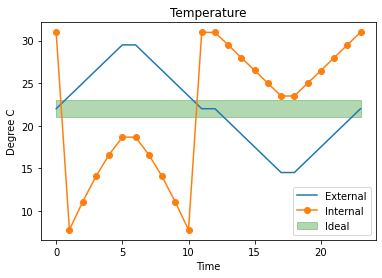

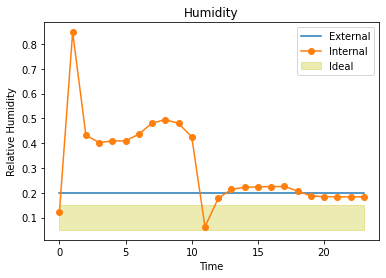

Episode: 500, Average Reward: -12478.640389608927
Episode: 1000, Average Reward: -3758.293159528299
Episode: 1500, Average Reward: -3788.136871466171
Episode: 2000, Average Reward: 2911.1577208856415
Episode: 2500, Average Reward: 3618.066921218579
Episode: 3000, Average Reward: 7510.9680520391485
Episode: 3500, Average Reward: 5414.965982475482
Episode: 4000, Average Reward: 10412.819586395051
Episode: 4500, Average Reward: 9668.966294837825
Episode: 5000, Average Reward: 8133.864359912041
Episode: 5500, Average Reward: 12015.358972486025
Episode: 6000, Average Reward: 12229.546907150883
Episode: 6500, Average Reward: 14151.86714157979
Episode: 7000, Average Reward: 13970.385652895566
Episode: 7500, Average Reward: 15051.842033314975
Episode: 8000, Average Reward: 15811.98465894143
Episode: 8500, Average Reward: 15448.746870061432
Episode: 9000, Average Reward: 15863.55042412183
Episode: 9500, Average Reward: 12804.668784847148
Episode: 10000, Average Reward: 15608.674089752121
Episod

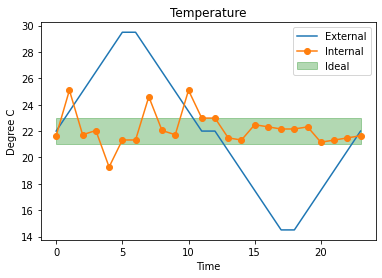

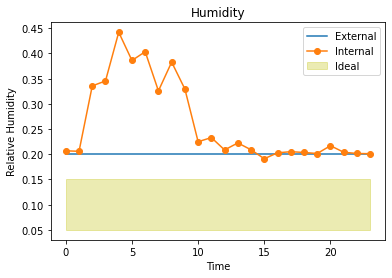

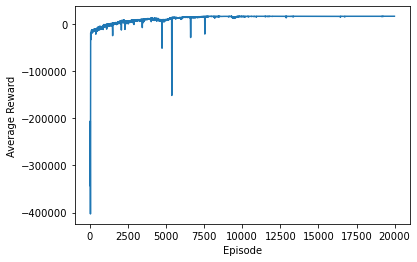

In [3]:
"""Vanilla Deep Q"""
from agents.DQ_Agent import DQAgent

action_size = env.action_space.n
observation_size = env.observation_space.n
agent = DQAgent(observation_size, action_size, seed=0)
rewards_history = []
num_episodes = int(2e4)

for i_episode in range(1, num_episodes):
    observation = env.reset()
    done = False
    while not done:

        action = agent.act(observation)
        next_observation, reward, done, info = env.step(action)
        agent.step(observation, action, reward, next_observation, done)
        observation = next_observation

    if i_episode == 1:
        env.render()

    if i_episode % 500 == 0:
        print(f"Episode: {i_episode}, Average Reward: {np.mean(rewards_history[-100:])}")
        # env.render()

    rewards_history.append(np.sum(env.reward_history))

print("Training Complete")
env.render()
rewards_DQ = np.convolve(rewards_history, np.ones(10), 'valid') / 10
x = np.arange(len(rewards_DQ))
plt.plot(x, rewards_DQ)
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()

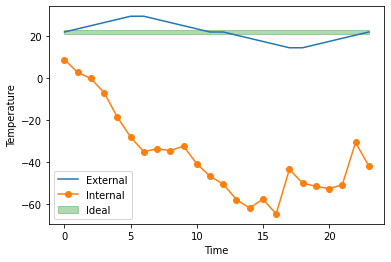

Episode: 500, Average Reward: -80253.64708427787
Episode: 1000, Average Reward: -15351.228287312975
Episode: 1500, Average Reward: -16743.472611806617
Episode: 2000, Average Reward: -14874.485707399239
Episode: 2500, Average Reward: -113341.22790521714
Episode: 3000, Average Reward: -137668.5809712179
Episode: 3500, Average Reward: -133788.56544135415
Episode: 4000, Average Reward: -133090.90729502504
Episode: 4500, Average Reward: -89089.68442783858
Episode: 5000, Average Reward: -89105.52104600772
Episode: 5500, Average Reward: -76869.77302111425
Episode: 6000, Average Reward: -64956.18279755647
Episode: 6500, Average Reward: -148263.66963000063
Episode: 7000, Average Reward: -130853.73860316904
Episode: 7500, Average Reward: -17975.63828499538
Episode: 8000, Average Reward: -8684.871866377742
Episode: 8500, Average Reward: -13210.906022687037
Episode: 9000, Average Reward: -17392.467447966952
Episode: 9500, Average Reward: -56206.97232762873
Episode: 10000, Average Reward: -41888.34

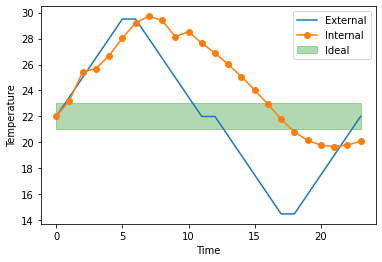

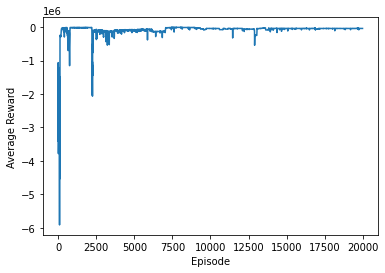

In [6]:
"""Prioritized Deep Q"""
from agents.PDQN_Agent import PDQNAgent

action_size = env.action_space.n
observation_size = env.observation_space.n
agent = PDQNAgent(observation_size, action_size, seed=1)
rewards_history = []
num_episodes = int(2e4)

for i_episode in range(1, num_episodes):
    observation = env.reset()
    done = False
    while not done:

        action = agent.act(observation)
        next_observation, reward, done, info = env.step(action)
        agent.step(observation, action, reward, next_observation, done)
        observation = next_observation

    if i_episode == 1:
        env.render()

    if i_episode % 500 == 0:
        print(f"Episode: {i_episode}, Average Reward: {np.mean(rewards_history[-100:])}")

    rewards_history.append(np.sum(env.reward_history))

print("Training Complete")
env.render()
rewards_PDQ = np.convolve(rewards_history, np.ones(10), 'valid') / 10
x = np.arange(len(rewards_PDQ))
plt.plot(x, rewards_PDQ)
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()

In [2]:
"""Continuous Gym Environment"""
# Note! the continuous environment does not have radiative heat flow yet!
env = gym.make("gym_greenhouse:greenhouse-continuous-v0")
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")

Action Space: Box(-10000.0, 10000.0, (1,), float32)
Observation Space: Discrete(6)


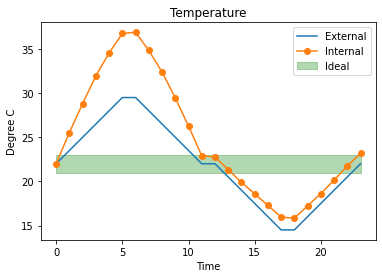

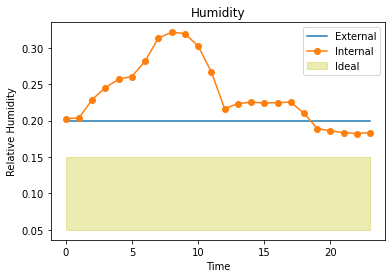

Episode: 500, Average Reward: -117242.54543638736


KeyboardInterrupt: 

In [3]:
"""Deep Deterministic Policy Gradient"""
from agents.DDPG_Agent import DDPGAgent
import random

action_size = env.action_space.shape[0]
observation_size = env.observation_space.n
agent = DDPGAgent(observation_size, action_size,  random_func=random)
rewards_history = []
num_episodes = int(1e4)

for i_episode in range(1, num_episodes):
    observation = env.reset()
    done = False
    while not done:

        action = agent.act(observation)
        next_observation, reward, done, info = env.step(action)
        agent.step(observation, action, reward, next_observation, done)
        observation = next_observation

    if i_episode == 1:
        env.render()

    if i_episode % 500 == 0:
        print(f"Episode: {i_episode}, Average Reward: {np.mean(rewards_history[-100:])}")

    rewards_history.append(np.sum(env.reward_history))

print("Training Complete")
env.render()
rewards_DDPG = np.convolve(rewards_history, np.ones(10), 'valid') / 10
x = np.arange(len(rewards_DDPG))
plt.plot(x, rewards_DDPG)
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()

## 5. Conclusion
---
Initial POC work is promising.
Vanilla Deep-Q without epsilon greedy exploration outperforms both other algorithms.
DDPG does surprisingly poorly, especially considering that the continuous environment doesn't have radiative heat flow.
Random seed initialization has large impact on the performance of PDQ and DDPG.

# todo
1. make abstract base class that is extended to a continuous and non-continuous form
2. add complexity to the physical simulation
    - air exchanges
    - CO2
    - humidity
    - transpiration
3. address todos in PDQ and DQ agent code